In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# the line above is necessary for getting 
# your plot embedded within the notebook
%matplotlib inline

dset = xr.open_dataset('/chinook/dallmann/MPI/ELI_Bins/pr_nino_moderate_MPI_anomDJFmean.nc')
print(dset)

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 384, year: 11)
Coordinates:
  * year      (year) int64 1955 1956 1961 1980 1983 ... 1993 1994 2006 2010 2011
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat       (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (year, lon, bnds) float64 ...
    lat_bnds  (year, lat, bnds) float64 ...
    pr        (year, lat, lon) float32 ...


In [2]:
# Take the average of the time for the respective ENSO Bin. Comment out the code when not using the mean of the file
dset = dset.mean('year')
dset

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 384)
Coordinates:
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat       (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    lat_bnds  (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    pr        (lat, lon) float32 -1.113e-07 -1.084e-07 ... -1.958e-07 -1.991e-07

In [3]:
precip = dset['pr']*86400*31

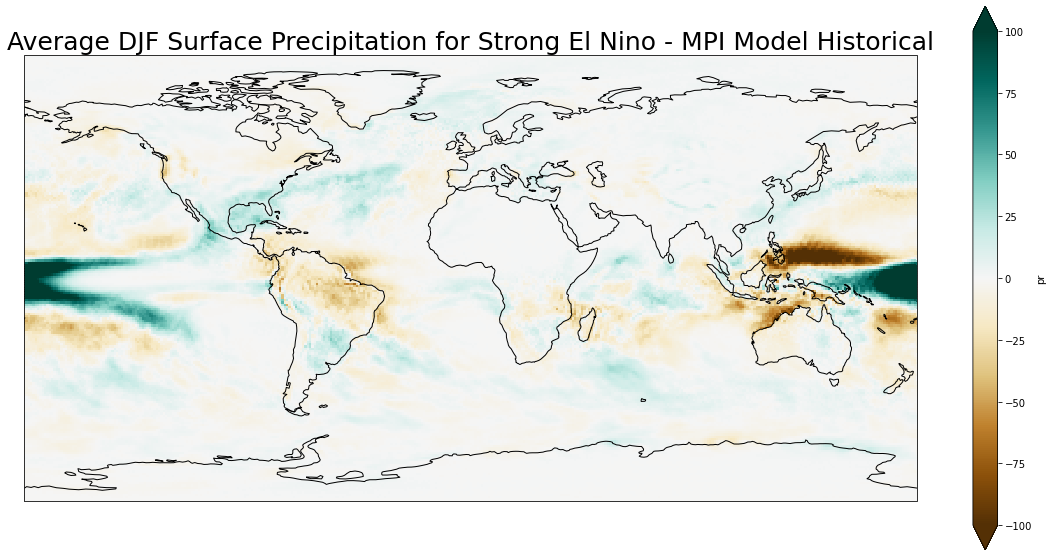

In [4]:
# The projection keyword determines how the plot will look
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

color_map = plt.cm.get_cmap('RdBu')
reversed_color_map = color_map.reversed()


# Use when looking at a specfic year
#precip.isel(year=0).plot(cmap= 'RdBu', vmin=-400, vmax=400)
#plt.title('DJF Precip in 1957 for Strong El Nino ', size='25')

# Use when looking at the average of a file
precip.plot(cmap= 'BrBG', vmin=-100, vmax=100)
plt.title('Average DJF Surface Precipitation for Strong El Nino - MPI Model Historical', size='25')



#ax.contourf(lon, lat, precip)  # didn't use transform, but looks ok...
plt.show()